In [ ]:
import pandas as pd
import os
df=pd.read_csv("/content/drive/MyDrive/attributes.csv")
df['neck'].fillna(df['neck'].mode()[0], inplace=True)
df['sleeve_length'].fillna(df['sleeve_length'].mode()[0], inplace=True)
df['pattern'].fillna(df['pattern'].mode()[0], inplace=True)
df['neck'] = df['neck'].astype(int)
df['sleeve_length'] = df['sleeve_length'].astype(int)
df['pattern'] = df['pattern'].astype(int)

df.head()

,filename,neck,sleeve_length,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6,3,4
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5,3,9
2,11479107741104-Tommy-Hilfiger-Men-Navy-Blue-St...,6,1,9
3,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,6,0,9
4,11516770810185-Splash-Men-Tshirts-767151677081...,6,3,9


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

import cv2

import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd
import tqdm
import os

def clean_data(df, folder):
    """
    this functions removes those rows from the DataFrame for which there are
    no images in the dataset
    """
    target = set(os.listdir('/content/drive/MyDrive/' + folder))
    drop_indices = []
    print('[INFO]: Checking if all images are present')
    for index, image_id in df.iterrows():
        if df['filename'][index] not in target:
          drop_indices.append(index)
    print(f"[INFO]: Dropping indices: {drop_indices}")
    df.drop(df.index[drop_indices], inplace=True)
    return df

In [ ]:
labels = clean_data(df.copy(), 'train')
labels = labels.iloc[:1425, :]

sample = clean_data(df, 'val')
sample = sample.iloc[:357, :]


[INFO]: Checking if all images are present
[INFO]: Dropping indices: [2, 4, 6, 7, 12, 13, 15, 16, 21, 22, 23, 24, 28, 30, 32, 34, 35, 38, 39, 41, 42, 43, 47, 48, 49, 54, 56, 59, 62, 63, 69, 71, 77, 78, 81, 83, 85, 88, 92, 97, 98, 102, 105, 107, 108, 111, 114, 122, 123, 126, 131, 136, 137, 143, 145, 149, 151, 156, 164, 167, 169, 172, 177, 180, 181, 182, 183, 186, 187, 188, 189, 190, 196, 198, 202, 205, 207, 209, 212, 213, 218, 226, 228, 230, 236, 238, 240, 241, 242, 243, 246, 253, 260, 263, 264, 266, 269, 275, 277, 278, 279, 282, 285, 286, 287, 294, 295, 297, 299, 305, 308, 315, 316, 317, 319, 320, 324, 326, 327, 330, 331, 332, 333, 335, 341, 342, 343, 344, 347, 353, 354, 356, 357, 361, 366, 370, 379, 381, 382, 385, 387, 390, 393, 395, 396, 397, 401, 402, 404, 406, 410, 412, 414, 415, 416, 418, 419, 420, 422, 423, 425, 426, 428, 436, 441, 443, 444, 447, 451, 453, 454, 455, 457, 458, 461, 465, 467, 469, 471, 475, 476, 481, 483, 484, 486, 487, 488, 489, 492, 493, 494, 495, 500, 503, 507, 

In [ ]:
sample.shape, labels.shape,len(os.listdir('/content/drive/MyDrive/val')), len(os.listdir('/content/drive/MyDrive/train'))

((357, 4), (1425, 4), 357, 1425)

In [ ]:
labels = labels.reset_index()
sample = sample.reset_index()

In [ ]:
labels.head()

,index,filename,neck,sleeve_length,pattern
0,0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6,3,4
1,1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5,3,9
2,3,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,6,0,9
3,5,11505295751483-FOREVER-21-Men-White-Self-Desig...,1,3,9
4,8,90044561-8959-460a-a650-49a6772237931537435887...,6,3,9


In [ ]:
sample.head()

,index,filename,neck,sleeve_length,pattern
0,4,11516770810185-Splash-Men-Tshirts-767151677081...,6,3,9
1,7,11461827372049-US-Polo-Assn-Navy-T-shirt-20714...,5,3,9
2,12,94b6ab4b-50c9-4d10-847a-4b4482531d651529052514...,6,3,8
3,16,11491288646955-FOREVER-21-Men-Tshirts-51914912...,1,3,9
4,21,11483007751246-HIGHLANDER-Men-Black-Colour-Blo...,6,0,9


Predicting pattern

In [ ]:
label_1 = labels.drop(['index', 'neck', 'sleeve_length'], axis = 1)
sample_1 = sample.drop(['index', 'neck', 'sleeve_length'], axis = 1)
label_1 = label_1.astype({"pattern": str})
sample_1 = sample_1.astype({"pattern": str})


In [ ]:
label_1.head()

,filename,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,4
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,9
2,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,9
3,11505295751483-FOREVER-21-Men-White-Self-Desig...,9
4,90044561-8959-460a-a650-49a6772237931537435887...,9


In [ ]:
# Data agumentation and pre-processing using tensorflow
train_path = '/content/drive/MyDrive/train'
gen = ImageDataGenerator(
        rescale=1./255.,
        horizontal_flip = True,
        validation_split=0.2 # training: 80% data, validation: 20% data
        )

train_generator = gen.flow_from_dataframe(
  label_1, # dataframe
  directory = train_path, # images data path / folder in which images are there
  x_col = 'filename',
  y_col = 'pattern',
  subset="training",
  color_mode="rgb",
  target_size = (331,331), # image height , image width
  class_mode="categorical",
  batch_size=32,
  shuffle=True,
  seed=42,
)


validation_generator = gen.flow_from_dataframe(
  label_1, # dataframe
  directory = train_path, # images data path / folder in which images are there
  x_col = 'filename',
  y_col = 'pattern',
  subset="validation",
  color_mode="rgb",
  target_size = (331,331), # image height , image width
  class_mode="categorical",
  batch_size=32,
  shuffle=True,
  seed=42,
)


Found 1140 validated image filenames belonging to 10 classes.
Found 285 validated image filenames belonging to 10 classes.


In [ ]:
x,y = next(train_generator)
x.shape # input shape of one record is (331,331,3) , 32: is the batch size


(32, 331, 331, 3)

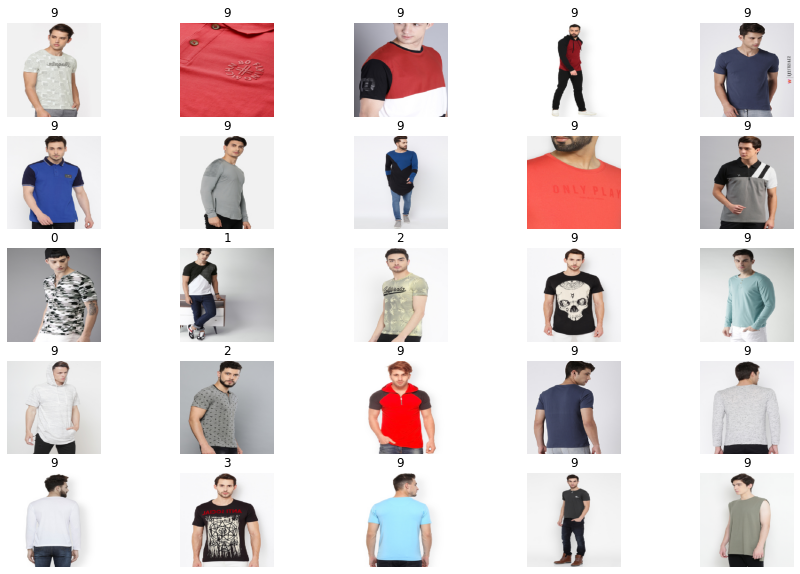

In [ ]:
a = train_generator.class_indices
class_names = list(a.keys()) # storing class/breed names in a list


def plot_images(img, labels):
  plt.figure(figsize=[15, 10])
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(img[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')

plot_images(x,y)


In [ ]:
# load the InceptionResNetV2 architecture with imagenet weights as base
base_model = tf.keras.applications.InceptionResNetV2(
          include_top=False,
          weights='imagenet',
          input_shape=(331,331,3)
          )

base_model.trainable=False
# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.BatchNormalization(renorm=True),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# categorical cross entropy is taken since its used as a loss function for
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
# other optimizers such as sgd can also be used depending upon the model


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 9, 9, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_407 (Ba  (None, 9, 9, 1536)       10752     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d_1   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 512)               786944    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                      

In [ ]:
early = tf.keras.callbacks.EarlyStopping( patience=10,
                    min_delta=0.001,
                    restore_best_weights=True)
# early stopping call back


In [ ]:
batch_size=32
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

# fit model
history = model.fit(train_generator,
          steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=validation_generator,
          validation_steps=STEP_SIZE_VALID,
          epochs= 30,
          callbacks=[early]
)


Epoch 1/30
35/35 [==============================] - 45s 663ms/step - loss: 1.1395 - accuracy: 0.7897 - val_loss: 0.7783 - val_accuracy: 0.8555
Epoch 2/30
35/35 [==============================] - 19s 544ms/step - loss: 0.8567 - accuracy: 0.8484 - val_loss: 0.6954 - val_accuracy: 0.8633
Epoch 3/30
35/35 [==============================] - 18s 517ms/step - loss: 0.7540 - accuracy: 0.8502 - val_loss: 0.6664 - val_accuracy: 0.8633
Epoch 4/30
35/35 [==============================] - 18s 497ms/step - loss: 0.7268 - accuracy: 0.8502 - val_loss: 0.6450 - val_accuracy: 0.8672
Epoch 5/30
35/35 [==============================] - 17s 492ms/step - loss: 0.6860 - accuracy: 0.8466 - val_loss: 0.7005 - val_accuracy: 0.8633
Epoch 6/30
35/35 [==============================] - 17s 490ms/step - loss: 0.6761 - accuracy: 0.8439 - val_loss: 0.6685 - val_accuracy: 0.8672
Epoch 7/30
35/35 [==============================] - 18s 499ms/step - loss: 0.6429 - accuracy: 0.8466 - val_loss: 0.7082 - val_accuracy: 0.8555

In [ ]:
model.save("Model.h5")


Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy:0.8718411326408386\nValidation Accuracy: 0.82421875')

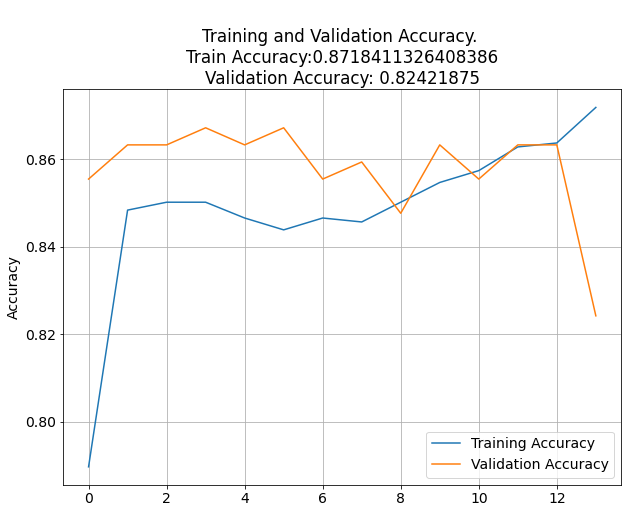

In [ ]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')


In [ ]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])


9/9 [==============================] - 6s 680ms/step - loss: 0.6891 - accuracy: 0.8596
[0.6890584826469421, 0.859649121761322]
Accuracy: 85.9649%
Loss:  0.6890584826469421


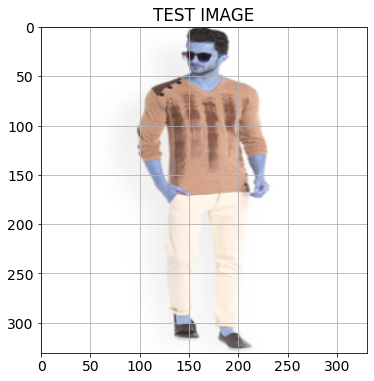

In [ ]:
test_path = '/content/drive/MyDrive/val'
test_img_path = test_path+"/01a05ca1-4745-4ee0-966b-fa5d8c34ae9c1527940268826-Campus-Sutra-Printed-Men-V-neck-Blue-T-Shirt-141152794026782-5.jpg"

img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (331, 331)).reshape(-1, 331, 331, 3)/255

plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])


In [ ]:
predictions = []

for image in sample.filename:
  img = tf.keras.preprocessing.image.load_img(test_path +'/'+ image)
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = tf.keras.preprocessing.image.smart_resize(img, (331, 331))
  img = tf.reshape(img, (-1, 331, 331, 3))
  prediction = model.predict(img/255)
  predictions.append(np.argmax(prediction))

my_submission = pd.DataFrame({'filename': sample.filename, 'pattern': predictions})
my_submission = my_submission.astype({"pattern": str})
my_submission.to_csv('submission.csv', index=False)

# Submission file ouput


Submission File: 
---------------

                                            filename pattern
0  11516770810185-Splash-Men-Tshirts-767151677081...       9
1  11461827372049-US-Polo-Assn-Navy-T-shirt-20714...       9
2  94b6ab4b-50c9-4d10-847a-4b4482531d651529052514...       9
3  11491288646955-FOREVER-21-Men-Tshirts-51914912...       9
4  11483007751246-HIGHLANDER-Men-Black-Colour-Blo...       9


In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(sample_1.pattern.values,my_submission.pattern.values)


In [ ]:
accuracy

0.8515406162464986